<a href="https://colab.research.google.com/github/dyong00/2020-2-AI/blob/master/code/09W_1_tf2_ch04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 활성화 함수 tanh

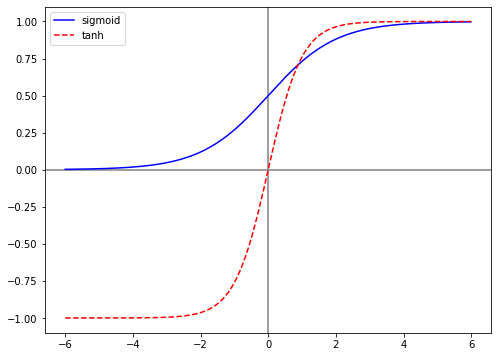

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-6, 6, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]

plt.figure(figsize=(8, 6)) 

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.legend()
plt.show()

# 인구증가율과 고령인구비율 회귀 분석

In [ ]:
import tensorflow as tf
import numpy as np

# 인구증가율과 고령인구비율
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47,
     -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51,
     12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(units=1)

])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 6)                 12        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 딥러닝 네트워크의 학습
model.fit(X, Y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 2ms/step - loss: 257.7682
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 107.8104
Epoch 3/10
1/1 [==============================] - 0s 1ms/step - loss: 10.7067
Epoch 4/10
1/1 [==============================] - 0s 1ms/step - loss: 9.8267
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 9.7710
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - loss: 9.7388
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 9.7069
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 9.6762
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 9.6493
Epoch 10/10
1/1 [==============================] - 0s 2ms/step - loss: 9.6284


In [ ]:
# 딥러닝 네트워크의 Y값 예측
model.predict(X)

array([[15.758104],
       [15.72765 ],
       [15.481655],
       [15.791122],
       [15.541275],
       [15.767374],
       [15.799404],
       [15.784134],
       [15.730146],
       [15.793442],
       [15.708864],
       [15.79022 ],
       [15.798628],
       [15.791895],
       [15.732597],
       [14.350519]], dtype=float32)

# 활성화 함수 tanh

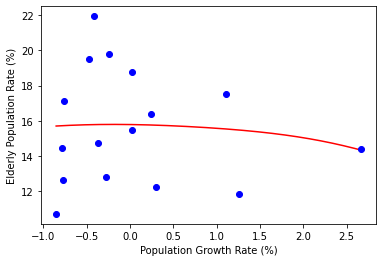

In [ ]:
# 딥러닝 네트워크의 회귀선 확인
import matplotlib.pyplot as plt

line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')

plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

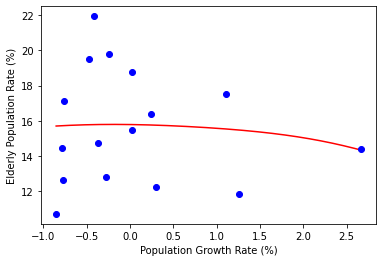

In [ ]:
import matplotlib.pyplot as plt

line_x = np.arange(min(x), max(x), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x, line_y, 'r-')
plt.plot(x, y, 'bo')

plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

# 보스턴 주택 가격 데이터세트(Boston Housing Dataset)

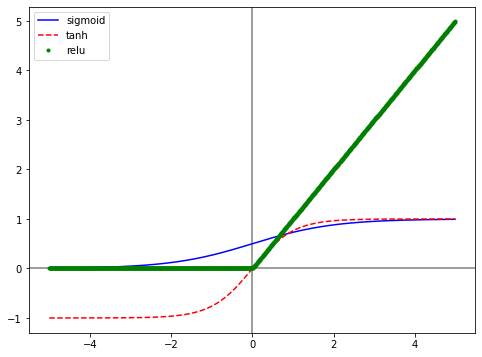

In [ ]:
# 활성화 함수
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]
relu = [0 if z < 0 else z for z in x]

plt.figure(figsize=(8, 6)) 

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.plot(x, relu, 'g.', label='relu')
plt.legend()
plt.show()

In [ ]:
# 데이터 불러오기
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

print(train_X.shape, test_X.shape)
print(train_X[0])
print(train_Y[0])

57344/57026 [==============================] - 0s 0us/step
(404, 13) (102, 13)
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [ ]:
# 데이터 전처리(정규화)
x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


In [ ]:
# Boston Housing Dataset 회귀 모델 생성
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 52)                728       
_________________________________________________________________
dense_7 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_8 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 회귀 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
10/10 [==============================] - 0s 14ms/step - loss: 2.0652 - val_loss: 1.4262
Epoch 2/25
10/10 [==============================] - 0s 3ms/step - loss: 0.7343 - val_loss: 0.9616
Epoch 3/25
10/10 [==============================] - 0s 3ms/step - loss: 0.4442 - val_loss: 0.5935
Epoch 4/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2941 - val_loss: 0.3689
Epoch 5/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2390 - val_loss: 0.3981
Epoch 6/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2040 - val_loss: 0.3577
Epoch 7/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1836 - val_loss: 0.3502
Epoch 8/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2020 - val_loss: 0.3310
Epoch 9/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1836 - val_loss: 0.3211
Epoch 10/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1654 - val_loss: 0.2847
Epoch 11/25
10/10 

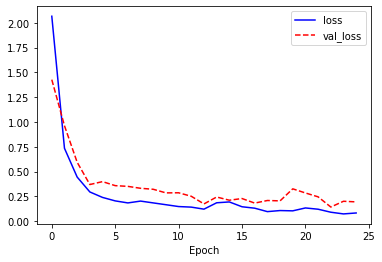

In [ ]:
# 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# 회귀 모델 평가
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 2ms/step - loss: 0.1958


0.195794478058815

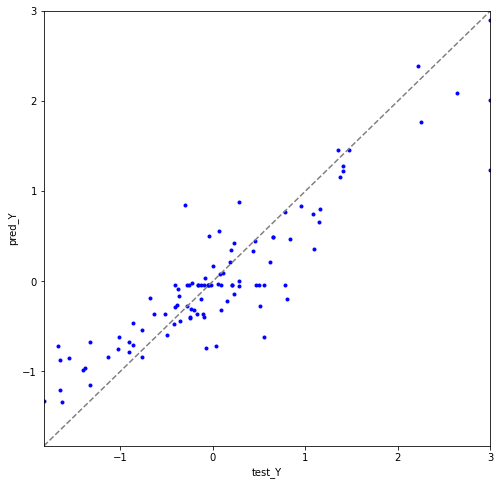

In [ ]:
# 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(8,8))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".5")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

In [ ]:
# 모델 재정의 및 학습
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/25
10/10 [==============================] - 0s 13ms/step - loss: 4.0097 - val_loss: 0.7833
Epoch 2/25
10/10 [==============================] - 0s 3ms/step - loss: 0.4659 - val_loss: 0.3936
Epoch 3/25
10/10 [==============================] - 0s 3ms/step - loss: 0.4951 - val_loss: 0.3498
Epoch 4/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2530 - val_loss: 0.6740
Epoch 5/25
10/10 [==============================] - 0s 3ms/step - loss: 0.6258 - val_loss: 0.4555
Epoch 6/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2534 - val_loss: 0.6331


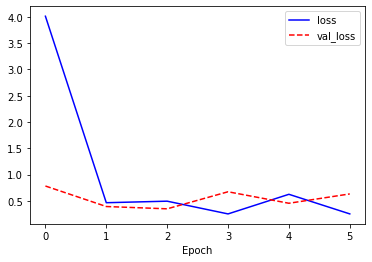

In [ ]:
# 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# 회귀 모델 평가
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 2ms/step - loss: 0.4710


0.4710257351398468

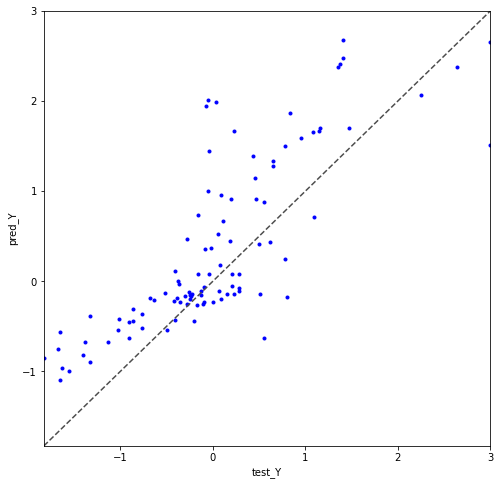

In [ ]:
# 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(8,8))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

In [ ]:
# 모델 재정의 및 학습, dropout 사용
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dropout(.1),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dropout(.1),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=4, monitor='val_loss')])

Epoch 1/25
10/10 [==============================] - 0s 14ms/step - loss: 2.2801 - val_loss: 0.6360
Epoch 2/25
10/10 [==============================] - 0s 5ms/step - loss: 0.4322 - val_loss: 0.5642
Epoch 3/25
10/10 [==============================] - 0s 4ms/step - loss: 0.4067 - val_loss: 0.3149
Epoch 4/25
10/10 [==============================] - 0s 4ms/step - loss: 0.2984 - val_loss: 0.3158
Epoch 5/25
10/10 [==============================] - 0s 4ms/step - loss: 0.2834 - val_loss: 0.2534
Epoch 6/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2428 - val_loss: 0.2580
Epoch 7/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2792 - val_loss: 0.3139
Epoch 8/25
10/10 [==============================] - 0s 4ms/step - loss: 0.2267 - val_loss: 0.2381
Epoch 9/25
10/10 [==============================] - 0s 4ms/step - loss: 0.2007 - val_loss: 0.1662
Epoch 10/25
10/10 [==============================] - 0s 4ms/step - loss: 0.1974 - val_loss: 0.1357
Epoch 11/25
10/10 

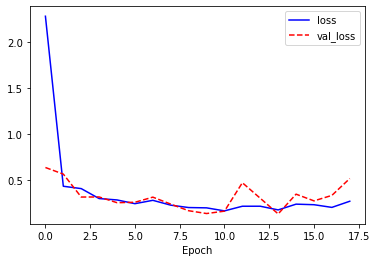

In [ ]:
# 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# 회귀 모델 평가
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 2ms/step - loss: 0.5034


0.5034228563308716

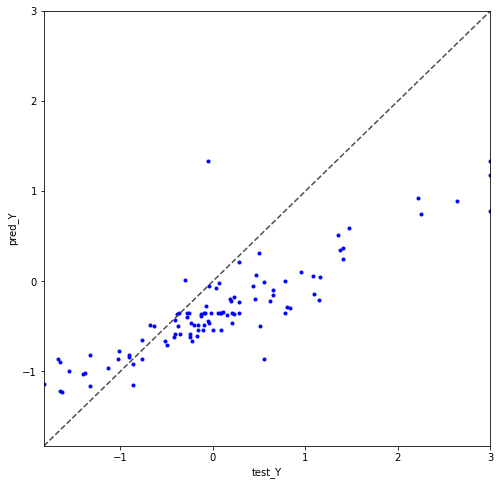

In [ ]:
# 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(8,8))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()